# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [2]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

Let's generate our dataset and take a look on it.

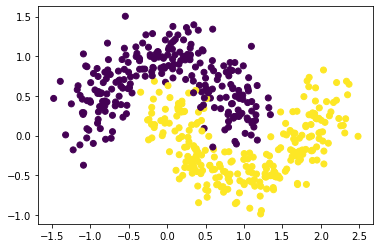

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

In [4]:
moons_points.shape

(500, 2)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(C = 0.01, max_iter = 500) # add some params
svm = SVC(kernel='linear', C = 0.1, probability = True) # here too

In [6]:
def plot_decisions(points, labels, clf):
  clf.fit(points, labels)

  plt.figure(figsize=(12, 10))
  plt.title(f"Decision regions of {clf.__class__.__name__}")

  plot_decision_regions(points, labels, clf)  

  plt.show()

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


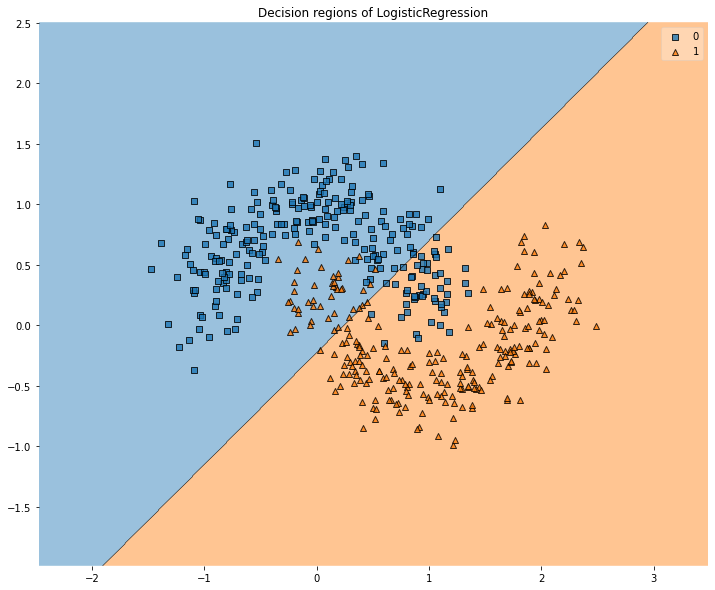

In [7]:
plot_decisions(moons_points, moons_labels, lr)

In [8]:
print(f"Accuracy score для LR - {accuracy_score(moons_labels, lr.predict(moons_points))}")

Accuracy score для LR - 0.808


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


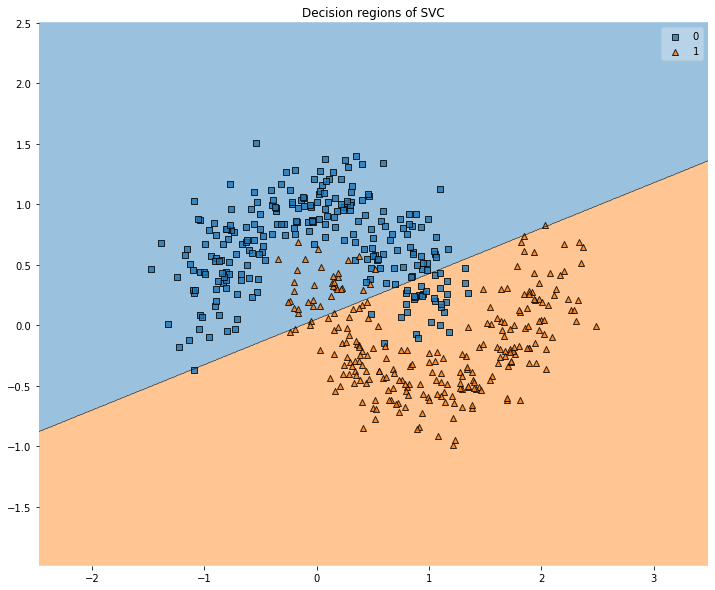

In [9]:
plot_decisions(moons_points, moons_labels, svm)

In [10]:
print(f"Accuracy score для SVM - {accuracy_score(moons_labels, svm.predict(moons_points))}")

Accuracy score для SVM - 0.858


Обе модели построили линейную разделяющую поверхность. Углы прямых, найденных LR и SVM хорошие, кажется, что у SVM он немного лучше. Точность SVM незначительно отличается от точности регрессии.

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [11]:
from sklearn.model_selection import GridSearchCV

#### RBF Kernel

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


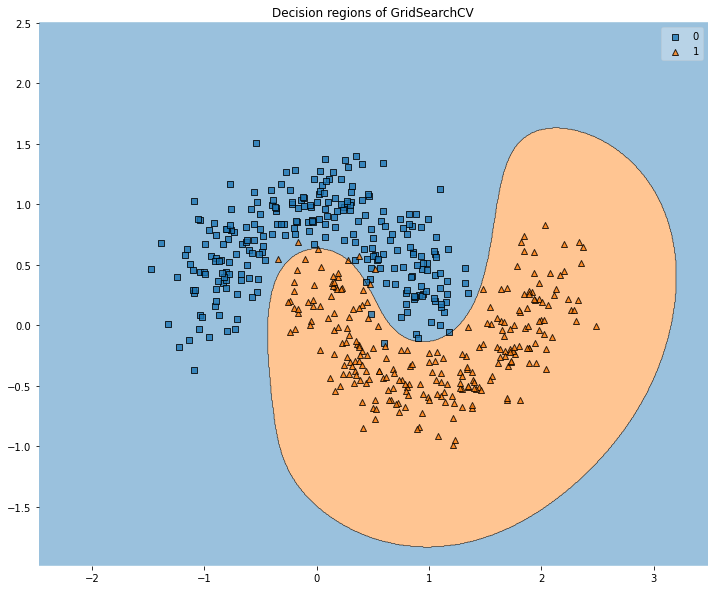

In [12]:
params = {
    "C": np.linspace(0.01, 10, 20),
    "gamma": np.linspace(1, 10)
}

svm = SVC(probability = True, kernel='rbf')

clf = GridSearchCV(svm, params, scoring='accuracy')

plot_decisions(moons_points, moons_labels, clf)

In [13]:
clf.best_params_

{'C': 3.690526315789474, 'gamma': 1.5510204081632653}

In [14]:
clf.score(moons_points, moons_labels)

0.984

#### Poly kernel

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


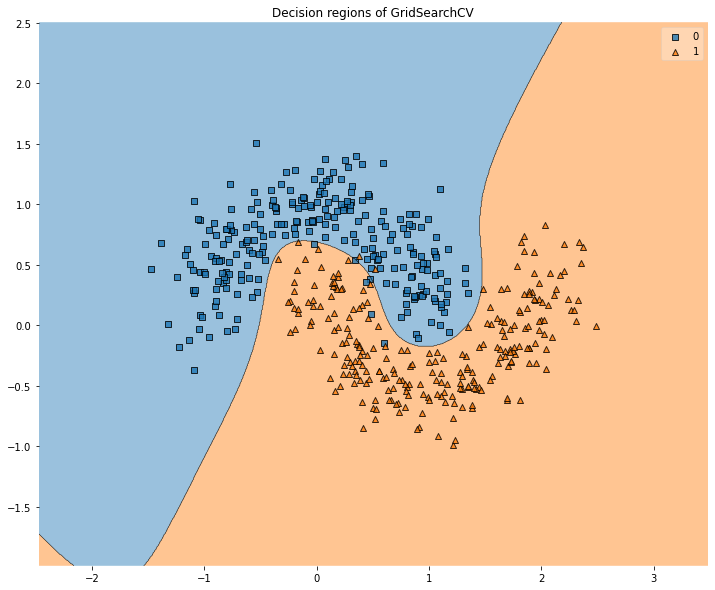

In [15]:
params = {
    "C": np.linspace(0.01, 5, 10),
    "degree": np.arange(1, 10),    
    "coef0": np.arange(0.1, 1, 0.1)
}
svm = SVC(kernel='poly', probability = True)

clf = GridSearchCV(svm, params, scoring='accuracy')

plot_decisions(moons_points, moons_labels, clf)

In [16]:
clf.best_params_

{'C': 2.227777777777778, 'coef0': 0.9, 'degree': 8}

In [17]:
clf.score(moons_points, moons_labels)

0.984

#### Sigmoid kernel

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


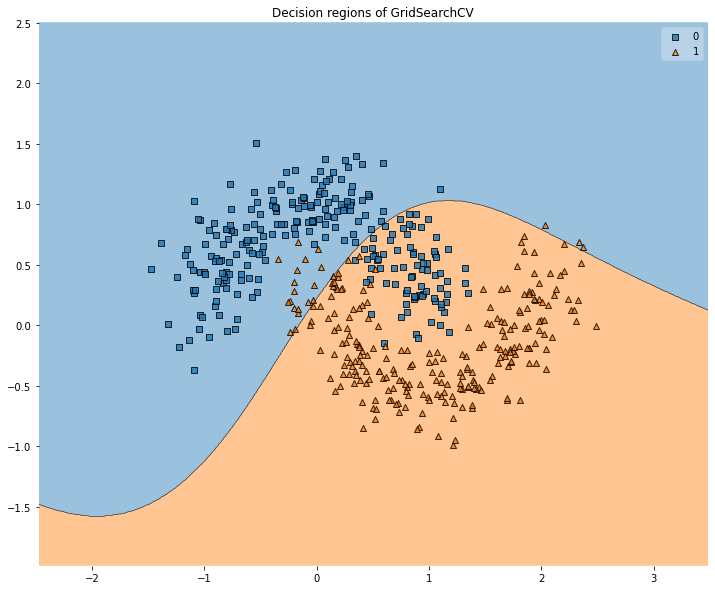

In [18]:
params = {
    "C": np.linspace(0.1, 5, 10),
    "gamma": np.linspace(0.5, 2, 5),
    "coef0": np.arange(0.1, 1, 0.1)
}

svm = SVC(probability = True, kernel='sigmoid')

clf = GridSearchCV(svm, params, scoring='accuracy')

plot_decisions(moons_points, moons_labels, clf)

In [19]:
clf.best_params_

{'C': 0.1, 'coef0': 0.9, 'gamma': 0.5}

In [20]:
clf.score(moons_points, moons_labels)

0.796

SVM c сигмоидальным ядром показало худший результат, линейное и rbf показали одинаковый (хороший) результат. С rbf ядром получается, что один класс окружен другим, тогда как линейное ядро рисует кривую между ними, что лучше. Оптимальная степень многочлена получилась 5.

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Compare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import matplotlib.gridspec as gridspec
from itertools import product

In [22]:
degrees = np.arange(2, 12)

params = {
    'clf__C': np.logspace(-10, 5, 85)
}

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.m

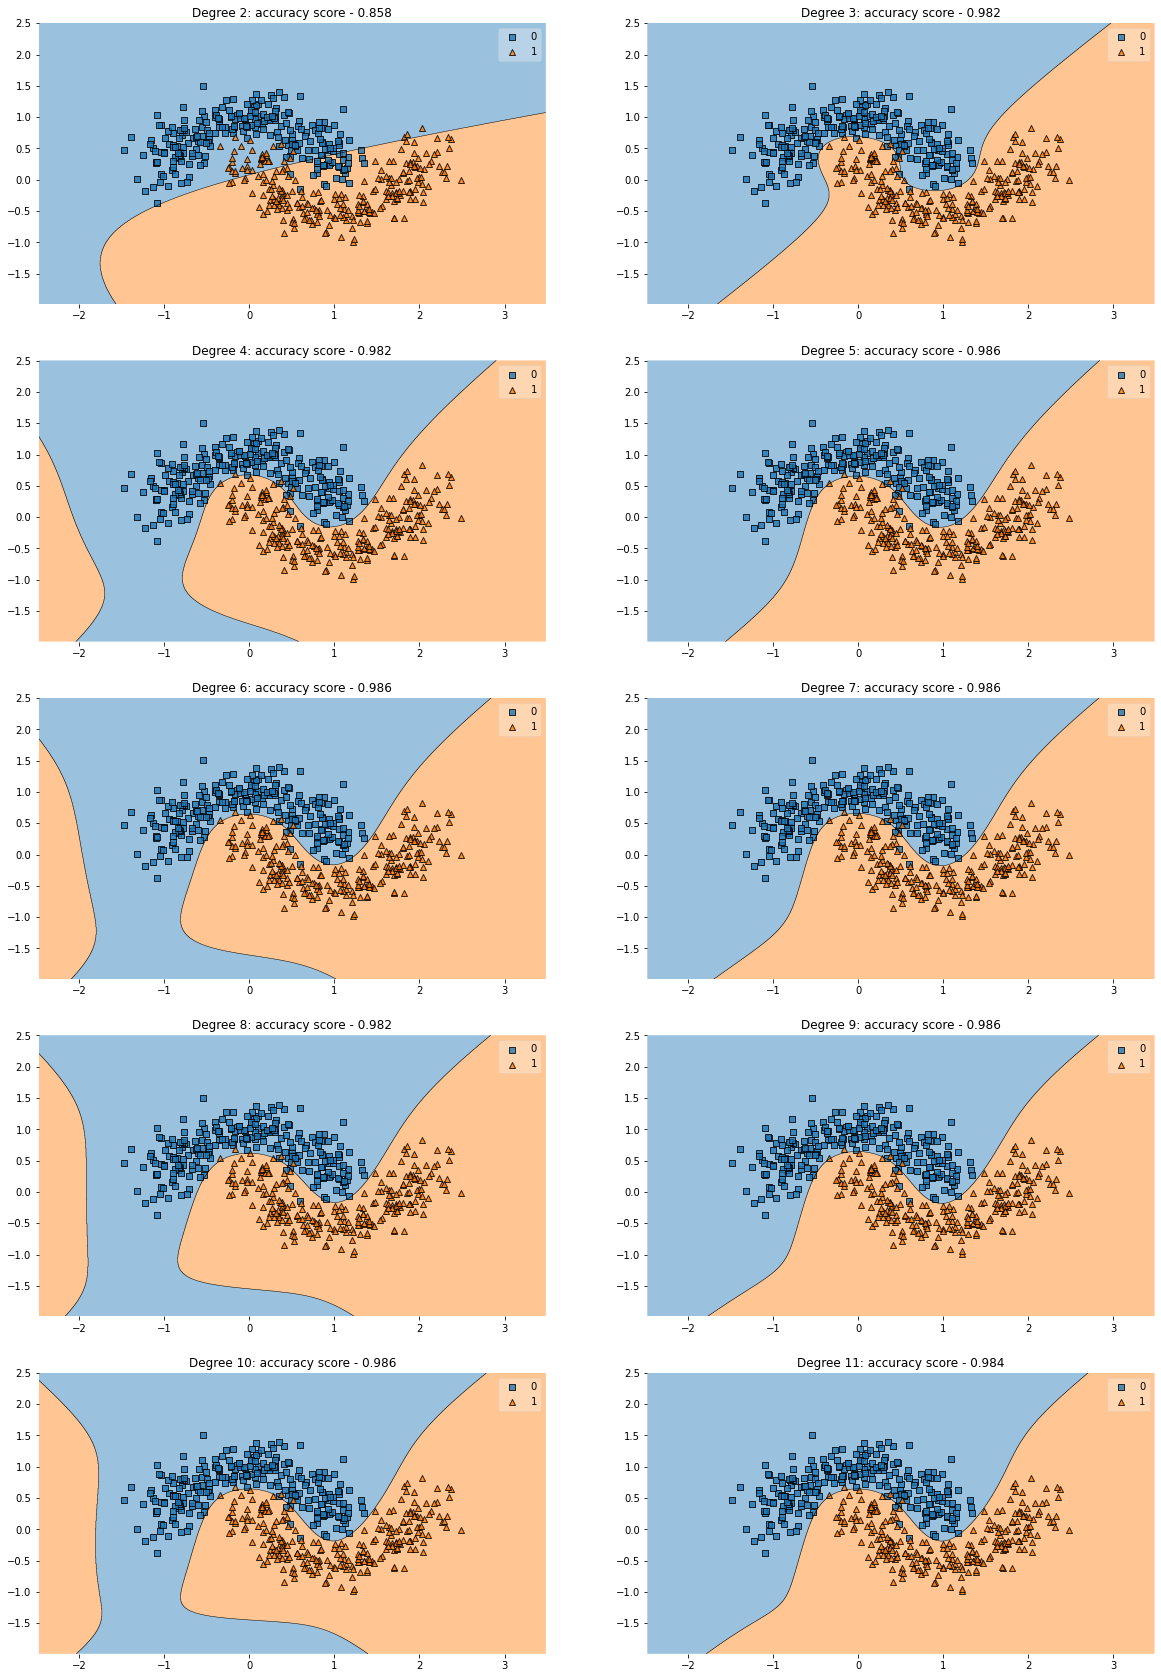

In [23]:
gs = gridspec.GridSpec(len(degrees) // 2, 2)
fig = plt.figure(figsize=(20,30))

for degree, grd in zip(degrees, product(np.arange(0, len(degrees) // 2), [0,1])):
    pipe = Pipeline([
        ('poly_features', PolynomialFeatures(degree)),
        ('clf', LogisticRegression(max_iter=500))
    ])

    clf = GridSearchCV(pipe, params, scoring='accuracy')
    
    clf.fit(moons_points, moons_labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(moons_points, moons_labels, clf)
    fig.set_title(f"Degree {degree}: accuracy score - {clf.score(moons_points, moons_labels)}")    

Преобразование признаков со степенью начиная с 5 дает почти идентичный результат с SVM. Границы классификаторов (часто, но не всегда) в целом очень похожи на те, что дал оптимальный SVM. Результаты и форма кривых лучших результатов LR c PolynomialFeatures и SVC с ядром poly очень похожи.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

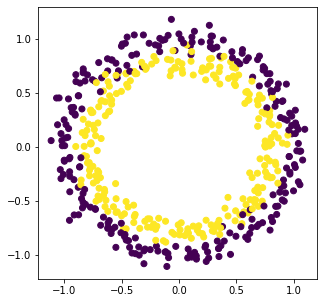

In [24]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

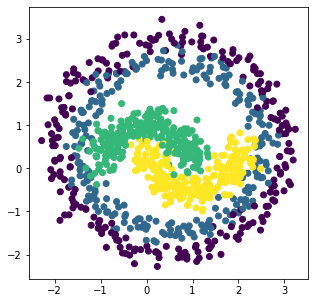

In [25]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

#### RBF Kernel

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


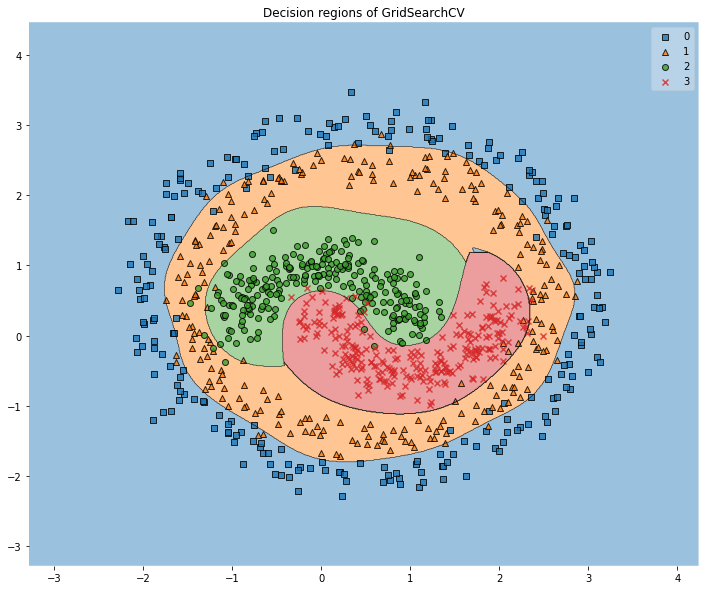

In [26]:
params = {
    "C": np.linspace(0.01, 10, 10),
    "gamma": np.linspace(1, 5, 10)
}

svm = SVC(probability = True, kernel='rbf')

clf = GridSearchCV(svm, params, scoring='accuracy')

plot_decisions(points, labels, clf)

In [27]:
clf.best_params_

{'C': 4.45, 'gamma': 1.4444444444444444}

In [28]:
clf.score(points, labels)

0.945

#### Poly kernel

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


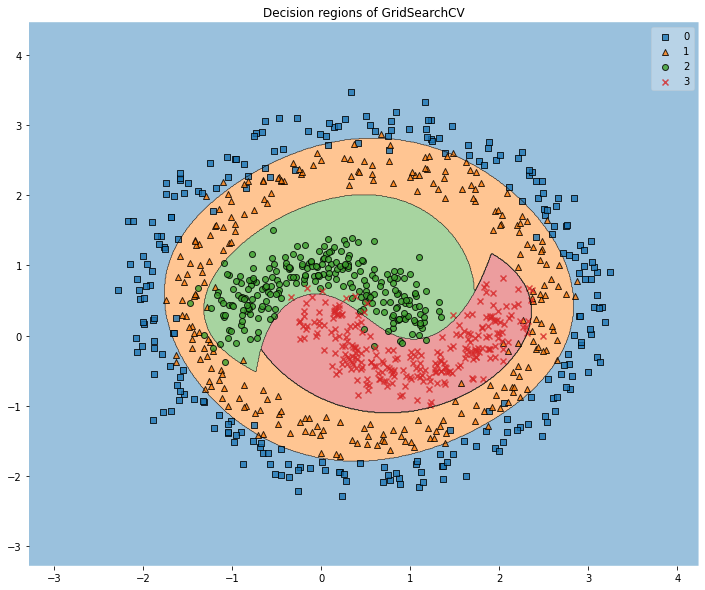

In [35]:
params = {
    "C": np.linspace(0.1, 5, 5),
    "degree": np.arange(3, 8),    
    "coef0": [0, 0.5, 1]
}
svm = SVC(kernel='poly', probability = True)

clf = GridSearchCV(svm, params, scoring='accuracy')

plot_decisions(points, labels, clf)

In [36]:
clf.best_params_

{'C': 5.0, 'coef0': 0.5, 'degree': 4}

In [37]:
clf.score(points, labels)

0.938

#### Sigmoid kernel

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


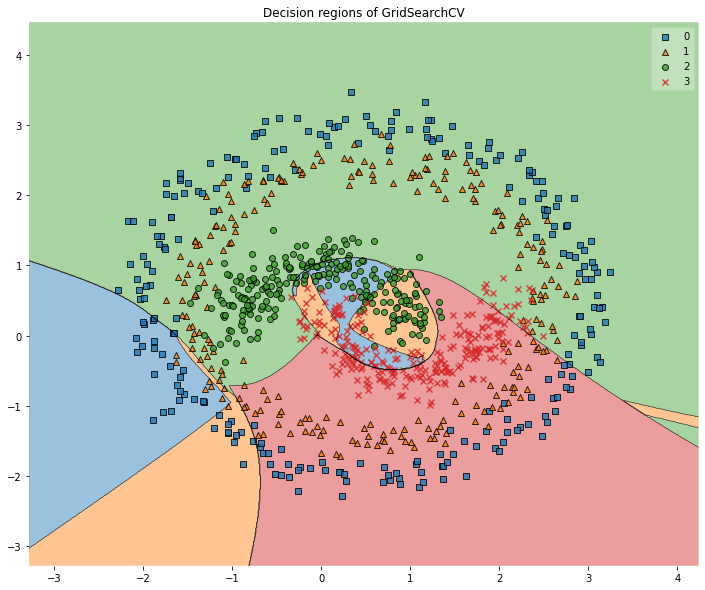

In [32]:
params = {
    "C": np.linspace(0.1, 5, 5),
    "gamma": np.linspace(0.5, 2, 5),
    "coef0": [0, 0.5, 1]
}

svm = SVC(probability = True, kernel='sigmoid')

clf = GridSearchCV(svm, params, scoring='accuracy')

plot_decisions(points, labels, clf)

In [33]:
clf.best_params_

{'C': 0.1, 'coef0': 0, 'gamma': 0.5}

In [34]:
clf.score(points, labels)

0.296

На этих данных SVM с сигмоидным ядром показали что-то странное. Ядра poly и rbf снова показывают похожий результат, в данном случае у rbf чуть лучше скор и края границ.

In [41]:
degrees = np.arange(4, 10)

params = {
    'clf__C': np.logspace(-10, 5, 85)
}

Выходные данные были обрезаны до нескольких последних строк (5000).
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://

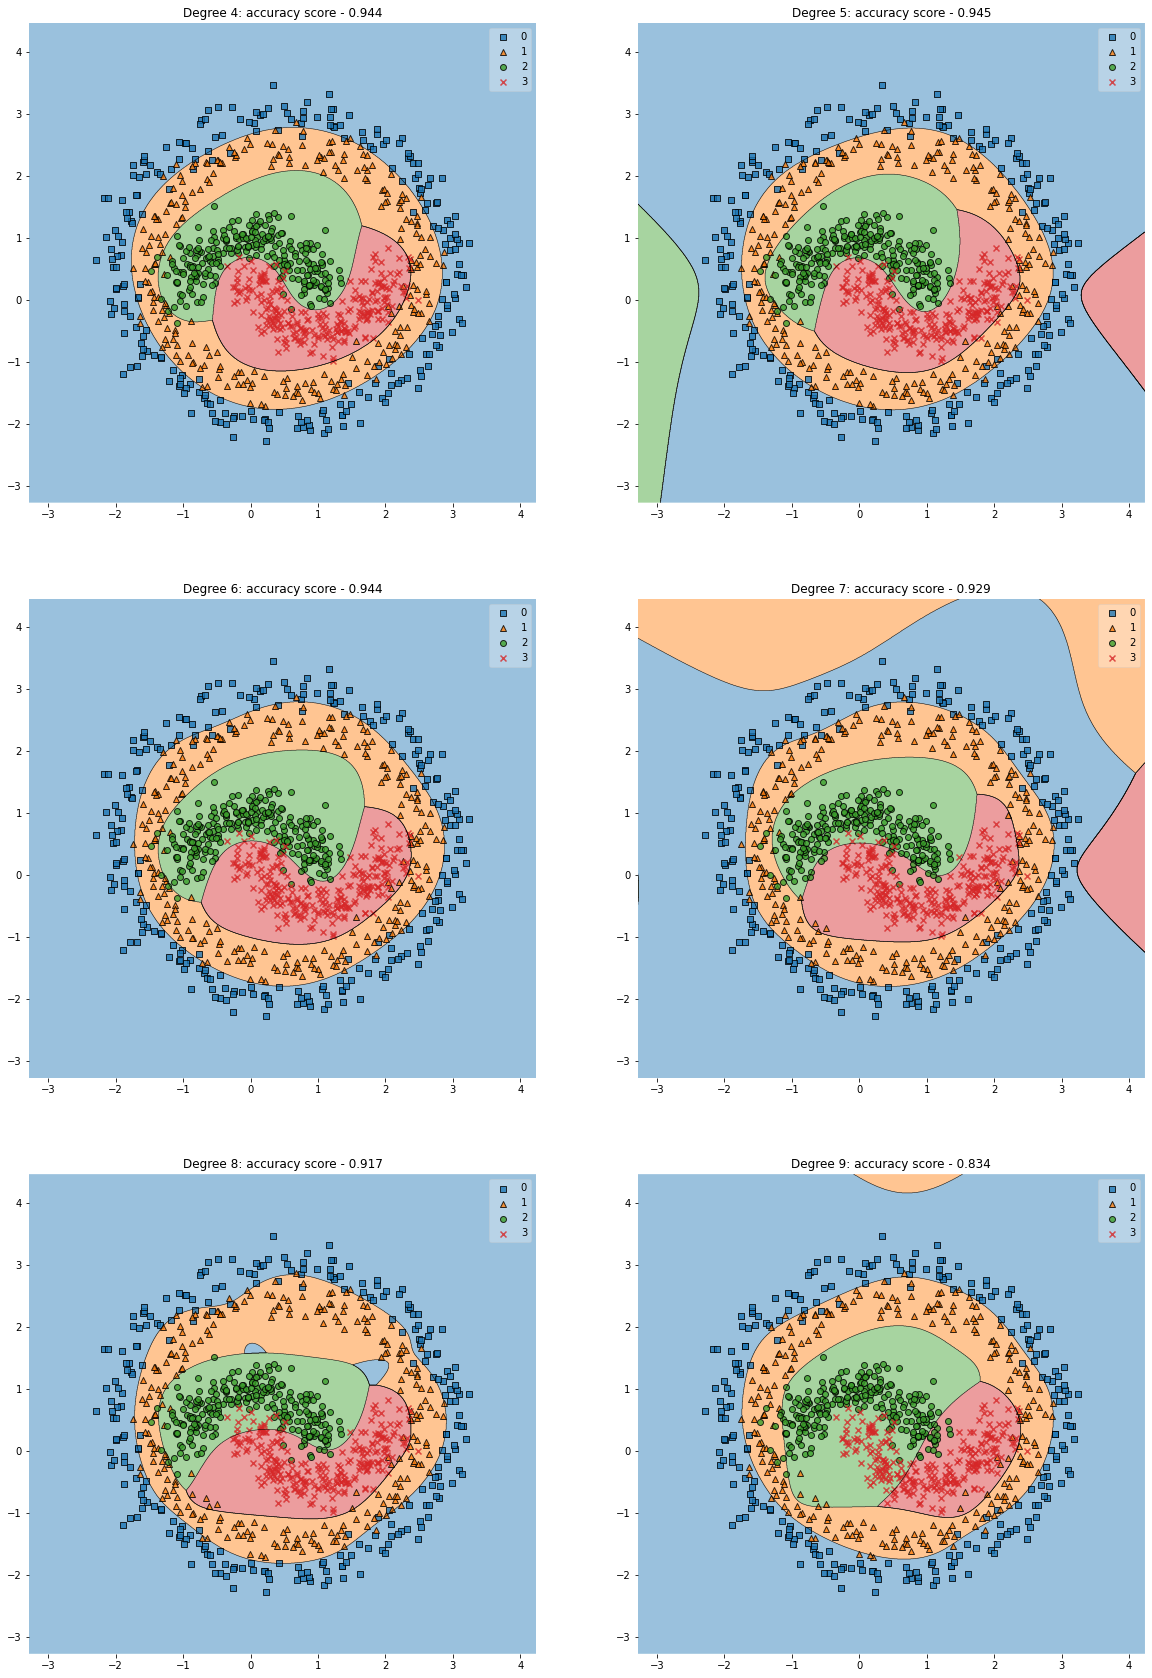

In [42]:
gs = gridspec.GridSpec(len(degrees) // 2, 2)
fig = plt.figure(figsize=(20,30))

for degree, grd in zip(degrees, product(np.arange(0, len(degrees) // 2), [0,1])):
    pipe = Pipeline([
        ('poly_features', PolynomialFeatures(degree)),
        ('clf', LogisticRegression(max_iter=500))
    ])

    clf = GridSearchCV(pipe, params, scoring='accuracy')
    
    clf.fit(points, labels)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(points, labels, clf)
    fig.set_title(f"Degree {degree}: accuracy score - {clf.score(points, labels)}")    

LR с добавлением новых фичей, как и в прошлый раз, работает также хорошо, как SVM с наилучшим ядром для этих данных. В данном случае оптимальная степень добавляемых фичей оказалась ниже, чем для предыдущей задачи. Эти данные сложнее разделить, поэтому скор немного ниже.